In [26]:




from os import path
from matplotlib import pyplot as plt
from utils import load_log_file

In [27]:




plt.style.use(['dark_background', 'bmh'])
plt.rc('axes', facecolor='k')
plt.rc('figure', facecolor='k')
plt.rc('figure', figsize=(20,5))

In [28]:




policy_path = './train_curve_fm/'

deterministic_name = 'model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature={nfeature}-dropout=0.1-nz=32-beta={beta}-zdropout=0.5-gclip=5.0-warmstart=0-seed=1-output_h=False-ksize=7-pt=1.log'

dtr_fms = list(deterministic_name.format(nfeature=nfeature, beta=beta) for nfeature in ['256', '512'] for beta in ['0.01','0.0001','1e-06'])

In [29]:




dtr_df = tuple(load_log_file(path.join(policy_path, policy),type='fm') for policy in dtr_fms)

In [30]:



print(dtr_fms)
print('Available columns:', *dtr_df[0].columns)

['model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature=256-dropout=0.1-nz=32-beta=0.01-zdropout=0.5-gclip=5.0-warmstart=0-seed=1-output_h=False-ksize=7-pt=1.log', 'model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature=256-dropout=0.1-nz=32-beta=0.0001-zdropout=0.5-gclip=5.0-warmstart=0-seed=1-output_h=False-ksize=7-pt=1.log', 'model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature=256-dropout=0.1-nz=32-beta=1e-06-zdropout=0.5-gclip=5.0-warmstart=0-seed=1-output_h=False-ksize=7-pt=1.log', 'model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature=512-dropout=0.1-nz=32-beta=0.01-zdropout=0.5-gclip=5.0-warmstart=0-seed=1-output_h=False-ksize=7-pt=1.log', 'model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.0001-nfeature=512-dropout=0.1-nz=32-beta=0.0001-zdropout=0.5-gclip=5.0-warmstart=0-seed=1-output_h=False-ksize=7-pt=1.log', 'model=fwd-cnn-vae-fp-layers=3-bsize=64-ncond=20-npred=20-lrt=0.

Text(0.5, 1.0, 'High β=0.1e-3')

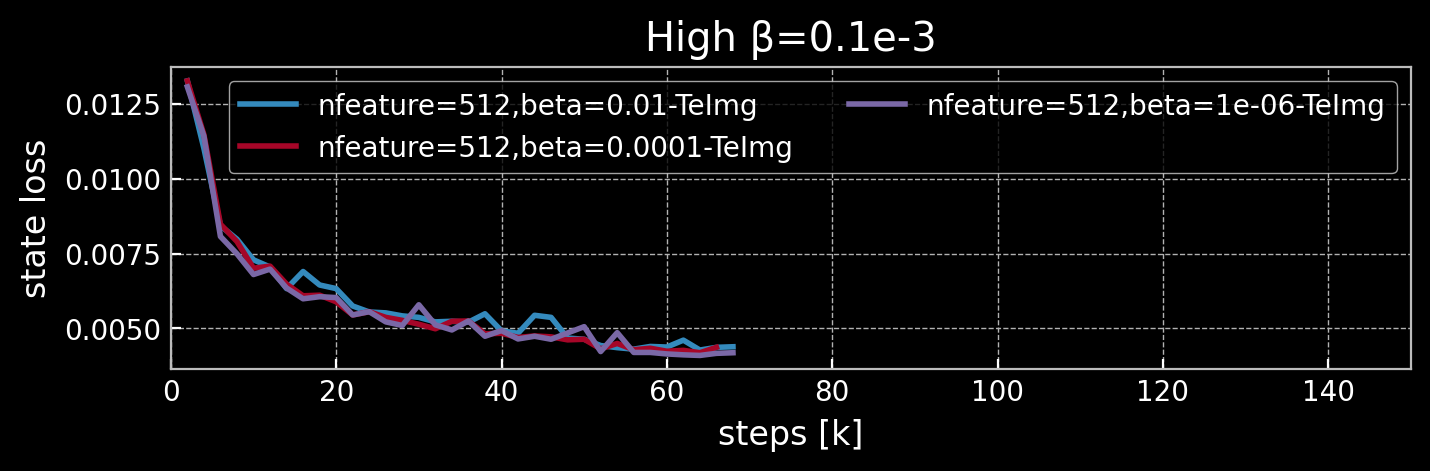

In [62]:



plt.figure(figsize=(8,2),dpi=200)
axis = None
items = ['TeImg']
#items = ['TrSta']
#items = ['TrKld', 'TeKld']
feature_list=['256', '512']
beta_list=['0.01','0.0001','1e-06']
# Plot deterministic policy
for n, df in enumerate(dtr_df):
    if n in [3,4,5]:
        nfeature = feature_list[n//3]
        beta= beta_list[n%3]
        labels = [f'nfeature={nfeature},beta={beta}-{i}' for i in items]
        #axis = df.plot(x='Step', y=items, label=labels, ax=axis)
        for i in range(len(items)):
            plt.plot(df['Step'].values/1e3, df[items[i]].values, label=labels[i])
        #print(df['Step'].values/1e3)


# Set some plotting config
plt.xlim(left=0,right=150)
#plt.ylim(top=0.02)
plt.ylabel('state loss')
plt.xlabel('steps [k]')
plt.legend(ncol=2)
plt.title("High β=0.1e-3")
